<a href="https://colab.research.google.com/github/kibutan/kaggle/blob/master/Digit_Recognizer_CNN(0_98435).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References
https://qiita.com/katsu1110/items/a8d508a1b6f07bd3a243

https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/discussion/109520

https://colab.research.google.com/drive/17MsV4f8Bap8y2MU8BcKBNXRdTNE2ftP3#scrollTo=wCrjGDbiCS3s



In [2]:
#kaggle.json 手動アップロード
#from google.colab import files
#files.upload()

In [3]:
#kaggle.jsonをGoogle Drive からひっぱってくるやつ
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

Download 100%.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.5MB 3.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=a83dc7e8c55d7124c6744e85100f812eae53f9747e6391077c01819f2629c5f2
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [6]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
imoore/60k-stack-overflow-questions-with-quality-rate               60k Stack Overflow Questions with Quality Rating     21MB  2020-09-11 18:28:28            848        141  1.0              
tunguz/us-elections-dataset                                         US Elections Dataset                                  7MB  2020-09-12 16:16:48           1509         62  0.9705882        
ihelon/lego-minifigures-classification                              LEGO Minifigures Classification                      15MB  2020-09-13 14:54:42            832         88  0.9411765        
anikannal/solar-power-generation-data   

In [7]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        258           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         98           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        366           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2478            True  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18586            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4836            True  
connectx

In [8]:
!kaggle competitions download -c digit-recognizer

 33% 5.00M/15.3M [00:00<00:00, 49.6MB/s]
100% 15.3M/15.3M [00:00<00:00, 89.9MB/s]


In [9]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [10]:
!pip install -q keras

個々からさきがあまりわからないので手探りする

https://www.kaggle.com/yuta0001/keras-cnn-score-0-99442-in-japanese#2.-%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%89%8D%E5%87%A6%E7%90%86

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

df_train = pd.read_csv("../content/train.csv")
df_test = pd.read_csv("../content/test.csv")

X_train = df_train.drop("label",axis =1).values
y_train = df_train["label"].values

X_test = df_test.values

import os
print(os.listdir("../content"))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['.config', 'digit-recognizer.zip', 'train.csv', 'test.csv', 'drive', 'sample_submission.csv', 'adc.json', 'sample_data']


In [12]:
# 検証用のデータ作成
random_seed = 1
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, random_state=random_seed)

count       785
unique        1
top       False
freq        785
dtype: object

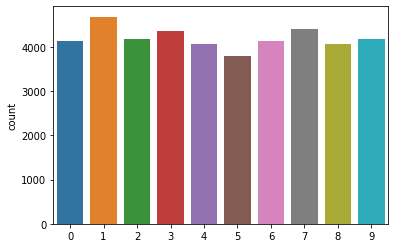

In [13]:
# 定数定義
img_rows, img_cols = 28, 28
num_classes = 10

# 教師データの分布を確認
sns.countplot(y_train)

# 欠損値の確認
df_train.isnull().any().describe() # unique:種類, top:最頻値, freq:最頻値の出現回数

In [14]:
# 正規化
X_train_split = X_train_split/255
X_test_split = X_test_split/255
X_test = X_test/255
X_train_all = X_train/255

# Reshape
X_train_split = X_train_split.reshape(-1,img_rows, img_cols, 1)
X_test_split = X_test_split.reshape(-1,img_rows, img_cols, 1)
X_test = X_test.reshape(-1,img_rows, img_cols,1)
X_train_all = X_train_all.reshape(-1, img_rows, img_cols, 1)

# one-hot-encoding
y_train_split = to_categorical(y_train_split, num_classes)
y_test_split = to_categorical(y_test_split, num_classes)
y_train_all = to_categorical(y_train, num_classes)

#np.shape(X_train_split) # (31500, 784)

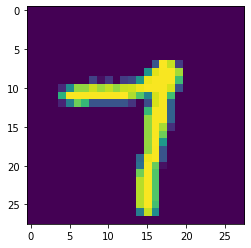

In [15]:
plt.imshow(X_train_split[0][:,:,0])

In [16]:
#Data Augmentation
# split用のDataAugmentationの作成
datagen_split = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1, # ランダムにズームする範囲
    width_shift_range=0.1, # ランダムに水平シフトする範囲
    height_shift_range=0.1, # ランダムに垂直シフトする範囲
    )
datagen_split.fit(X_train_split)

# 全データ用のDataAugmentationの作成
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    )
datagen.fit(X_train_all)

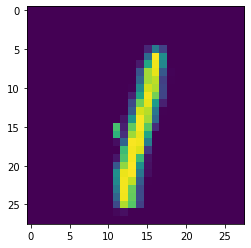

In [17]:
# Augmentationデータの確認
tmp = datagen_split.flow(X_train_split, y_train_split)
tmp_x = tmp.__getitem__(0)[0]
plt.imshow((tmp_x[0][:,:,0]))

In [18]:
# CNNモデルの構築
class CNN():
    def __init__(self):
        self.X_input = Input((img_rows,img_cols,1))
        self.X = Conv2D(filters=64, kernel_size=(5,5), padding="valid")(self.X_input)
        #self.X = Conv2D(filters=64, kernel_size=(5,5), padding="valid")(self.X) ### add
        self.X = Activation('relu')(self.X)
        self.X = MaxPooling2D(pool_size = (2,2))(self.X)
        self.X = Dropout(rate=0.1, seed=random_seed)(self.X) ### add
        
        self.X = Conv2D(filters=128, kernel_size=(5,5), padding="valid")(self.X)
        #self.X = Conv2D(filters=64, kernel_size=(5,5), padding="same")(self.X) ### add
        self.X = Activation('relu')(self.X)
        self.X = MaxPooling2D(pool_size = (2,2))(self.X)
        self.X = Dropout(rate=0.1, seed=random_seed)(self.X) ### add
        
        self.X = Flatten()(self.X)
        self.X = Dense(num_classes, activation="softmax")(self.X)
        
    def Make_model(self):
        # モデルの作成。入出力を与えるとインスタンスを作成できる。
        model = Model(inputs=self.X_input, outputs=self.X)
        
        ### model = Model(inputs=self.X_input, outputs=self.X)
        return model 


In [19]:
# モデル構築
cnn_object_origData = CNN() # DataAugmentation を追加しない場合の結果の評価用
cnn_model_origData = cnn_object_origData.Make_model()

cnn_object_dataAug = CNN() # DataAugmentationを追加して評価する用
cnn_model_dataAug = cnn_object_dataAug.Make_model()

# compile
#
#optimizer=tf.train.AdamOptimizer() → optimizer=tf.optimizers.Adam() 2020/09/14 きぶ


cnn_model_origData.compile(optimizer=tf.optimizers.Adam(),loss="categorical_crossentropy", # DataAugmentation を追加しない場合の結果の評価用
                 metrics=["accuracy"])
cnn_model_dataAug.compile(optimizer=tf.optimizers.Adam(),loss="categorical_crossentropy", # DataAugmentationを追加して評価する用
                 metrics=["accuracy"])

# fit
history_origData = cnn_model_origData.fit(X_train_split, y_train_split, epochs=100, validation_data=(X_test_split, y_test_split)) #DataAugmentationを追加しないモデル
history_dataAug = cnn_model_dataAug.fit_generator(datagen_split.flow(X_train_split, y_train_split), # DataAugmentationを追加したモデル
                        steps_per_epoch=X_train_split.shape[0],
                        epochs=10, validation_data=(X_test_split, y_test_split))

Epoch 1/100
  1/985 [..............................] - ETA: 1:48 - loss: 2.2677 - accuracy: 0.1562WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0008s vs `on_train_batch_end` time: 0.0174s). Check your callbacks.


983/985 [============================>.] - ETA: 0s - loss: 0.1717 - accuracy: 0.9465WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0008s vs `on_test_batch_end` time: 0.0056s). Check your callbacks.


985/985 [==============================] - 19s 20ms/step - loss: 0.1715 - accuracy: 0.9466 - val_loss: 0.0673 - val_accuracy: 0.9807
Epoch 2/100
985/985 [==============================] - 19s 19ms/step - loss: 0.0500 - accuracy: 0.9837 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 3/100
697/985 [====================>.........] - ETA: 4s - loss: 0.0321 - accuracy: 0.9891

KeyboardInterrupt: ignored

In [ ]:
cnn_model_origData.summary()


In [ ]:
# evaluate for training data
cnn_model_origData.evaluate(X_train_split, y_train_split)

In [ ]:
cnn_model_dataAug.evaluate(X_train_split, y_train_split)

In [ ]:
# evaluate for created test data
cnn_model_origData.evaluate(X_test_split, y_test_split)

In [ ]:
cnn_model_dataAug.evaluate(X_test_split, y_test_split)

In [ ]:
# 
y_test_split_predict_origData = np.argmax(cnn_model_origData.predict(X_test_split, verbose=1),axis=1)
y_test_split_predict_dataAug = np.argmax(cnn_model_dataAug.predict(X_test_split, verbose=1),axis=1)
y_test_split_class = np.argmax(y_test_split,axis=1) # shape(10500,)

In [ ]:
# Confustion Matrix
# This code is taken from sklearn site(https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
confusion_mtx_origData = confusion_matrix(y_test_split_class, y_test_split_predict_origData)
plot_confusion_matrix(confusion_mtx_origData, range(num_classes))

In [ ]:
confusion_mtx_dataAug = confusion_matrix(y_test_split_class, y_test_split_predict_dataAug)
plot_confusion_matrix(confusion_mtx_dataAug, title="Confusion matrix(with Data Augmentation)", classes=range(num_classes))

In [ ]:
#acc→ accuracy
#val_acc →val_accuracy

plt.plot(history_origData.history["accuracy"])
plt.plot(history_origData.history["val_accuracy"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train_sp","test_sp"],loc="upper left")
plt.show()

In [1]:
if __name__ == "__main__":
    # 全トレーニングデータを用いて学習モデルを作成
    cnn_object = CNN()
    cnn_model = cnn_object.Make_model()
    cnn_model.compile(optimizer=tf.optimizers.Adam(),loss="categorical_crossentropy",
                         metrics=["accuracy"])

    #cnn_model.fit(X_train_all, y_train_all, epochs=5)
    cnn_model.fit_generator(datagen.flow(X_train_all, y_train_all), # DataAugmentationを追加したモデル
                                steps_per_epoch=X_train_all.shape[0],
                                epochs=100)

    y_test = cnn_model.predict(X_test, verbose=1)
    y_pred_classes = np.argmax(y_test,axis = 1) 

    sample = pd.DataFrame(np.arange(28000)+1,columns=['ImageId'])
    sample["Label"] = np.zeros(28000)
    submit_sample = sample.copy()
    submit_sample["Label"] = y_pred_classes

NameError: ignored

In [62]:
cnn_model.evaluate(X_test_split, y_test_split)

329/329 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9867


[0.046267732977867126, 0.9866666793823242]

In [63]:
submit_sample.to_csv("dnn_submit_cnn_01.csv", index=False)


In [64]:
!kaggle competitions submit digit-recognizer -f dnn_submit_cnn_01.csv -m "Yeah! I submit my file through the Google Colab!"

100% 208k/208k [00:02<00:00, 78.2kB/s]
Successfully submitted to Digit Recognizer